In [143]:
import pandas as pd 
import numpy as np 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

* Load the Data file 

In [144]:
df= pd.read_csv('E:\TeleComChurnDetection\WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print(df.head())

In [145]:
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure   
5522  2619-WFQWU  Female              0      No         No       1  \
4785  8854-CCVSQ    Male              0      No         No      18   
6319  8904-OPDCK    Male              1     Yes         No      54   
6785  3090-HAWSU    Male              0      No         No      61   
808   4289-DTDKW    Male              0     Yes         No      40   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...   
5522          Yes                No     Fiber optic             No  ...  \
4785          Yes               Yes     Fiber optic             No  ...   
6319           No  No phone service             DSL             No  ...   
6785          Yes               Yes     Fiber optic            Yes  ...   
808           Yes               Yes     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
5522               No          No          No              No  Month-to-month  \
4785               No          No          No              No  Month-to-month   
6319               No          No          No              No  Month-to-month   
6785              Yes         Yes         Yes             Yes        Two year   
808                No          No         Yes             Yes  Month-to-month   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges   
5522              Yes               Mailed check          70.15         70.15  \
4785              Yes           Electronic check          80.65        1451.9   
6319              Yes  Bank transfer (automatic)          24.95       1364.75   
6785              Yes    Credit card (automatic)         111.60       6876.05   
808               Yes           Electronic check         101.30        4113.1   

     Churn  
5522   Yes  
4785   Yes  
6319    No  
6785   Yes  
808    Yes  

[5 rows x 21 columns]

In [146]:
df.shape

(7043, 21)

In [147]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [148]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [149]:
df.describe()
# check the mean etc meaning descriptive values of variables

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [150]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

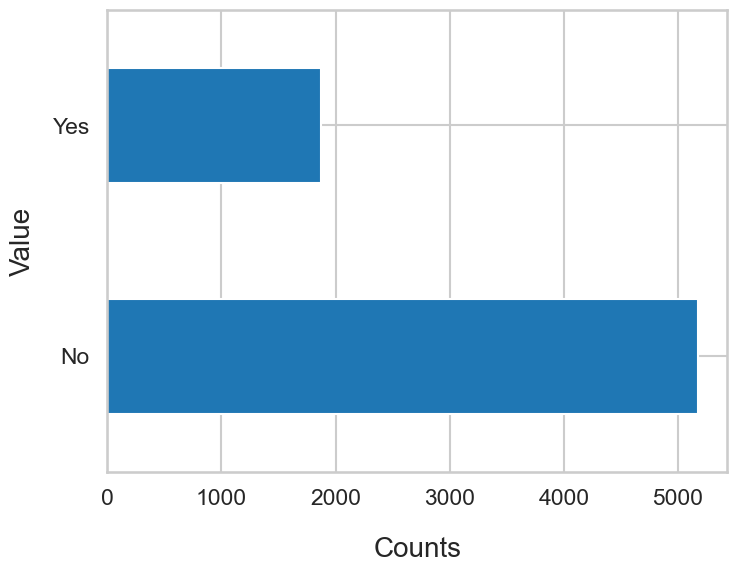

In [151]:
df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('Counts',labelpad=20)
plt.ylabel('Value',labelpad=12)
plt.show()

In [152]:
# for ratio
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

* Data is highly imbalanced 73:27
* So we analyse the data with other features while targeting values seperately to get some insights 

In [153]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [154]:
null_missingvalues = pd.DataFrame((df.isnull().sum())*100 /df.shape[0]).reset_index()
null_missingvalues

index    0
0         customerID  0.0
1             gender  0.0
2      SeniorCitizen  0.0
3            Partner  0.0
4         Dependents  0.0
5             tenure  0.0
6       PhoneService  0.0
7      MultipleLines  0.0
8    InternetService  0.0
9     OnlineSecurity  0.0
10      OnlineBackup  0.0
11  DeviceProtection  0.0
12       TechSupport  0.0
13       StreamingTV  0.0
14   StreamingMovies  0.0
15          Contract  0.0
16  PaperlessBilling  0.0
17     PaymentMethod  0.0
18    MonthlyCharges  0.0
19      TotalCharges  0.0
20             Churn  0.0

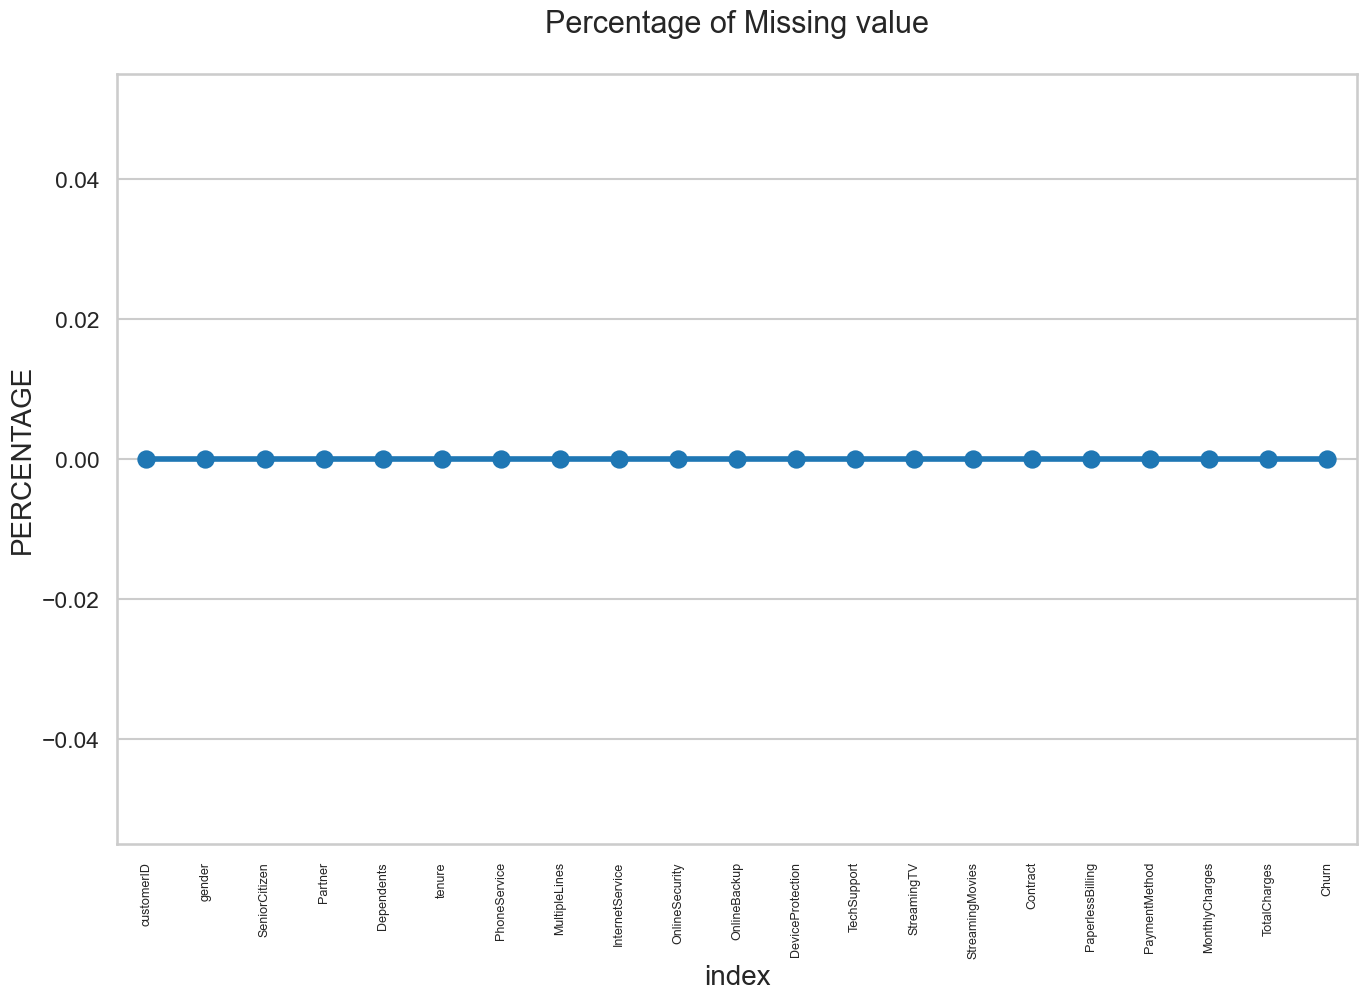

In [155]:
plt.figure(figsize=(16,10))
ax = sns.pointplot(x='index',y=0,data=null_missingvalues)
plt.xticks(rotation=90,fontsize=9)
plt.title("Percentage of Missing value")
plt.ylabel("PERCENTAGE")
plt.show()

* We dont have any Missing Values

# Data Cleaning

In [156]:
df_copy=df.copy()

In [157]:
df_copy.TotalCharges=pd.to_numeric(df_copy.TotalCharges,errors='coerce')
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [158]:
df_copy.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [159]:
df_copy.loc[df_copy['TotalCharges'].isnull()==True]

customerID  gender  SeniorCitizen Partner Dependents  tenure   
488   4472-LVYGI  Female              0     Yes        Yes       0  \
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...   
488            No  No phone service             DSL                  Yes  ...  \
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV   
488                   Yes                  Yes                  Yes  \
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling   
488                    No  Two year              Yes  \
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [160]:
df_copy.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [161]:
df_copy.dropna(how='any',inplace=True)
# df_copy.fillna(10)

In [162]:
df_copy.loc[df_copy['TotalCharges'].isnull()==True]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

* Divide the customers into bins based on tenure like 1-12,13-24 ......and so on 

In [163]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [164]:
df_copy['tenure'].max()

72

In [165]:
# Group the tenure in bins for 12 months
# bins = range(1,72,12)
# labels = [f'{i}-{i+11}' for i in  range(1,72,12)]
# df_copy['tenure_group']=pd.cut(df_copy.tenure,range(1,80,12),right=False,labels=labels)
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_copy['tenure_group'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels=labels)


In [166]:
df_copy['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [167]:
# df_copy['tenure_group'].sum() this is categorical data 
# therefore we cant use sum

In [168]:
df_copy.drop(['customerID','tenure'],inplace=True,axis=1)
# df_copy.drop(columns=['customerID','tenure'],inplace=True)Both correct


In [169]:
df_copy.head(2)

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines   
0  Female              0     Yes         No           No  No phone service  \
1    Male              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport   
0             DSL             No          Yes               No          No  \
1             DSL            Yes           No              Yes          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No              No  Month-to-month              Yes  \
1          No              No        One year               No   

      PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0  Electronic check           29.85         29.85    No       1 - 12  
1      Mailed check           56.95       1889.50    No      25 - 36

# Data Exploration 

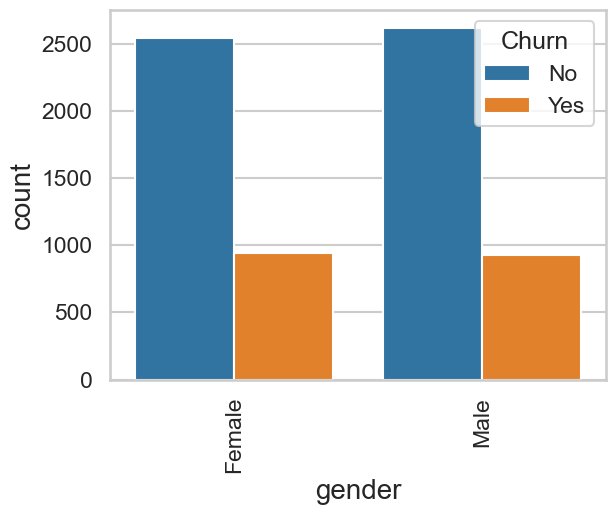

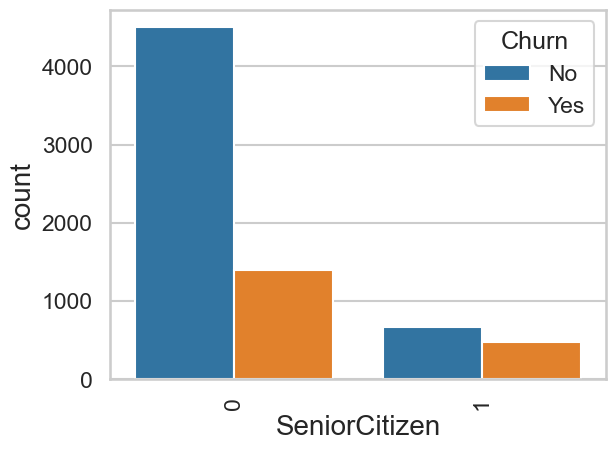

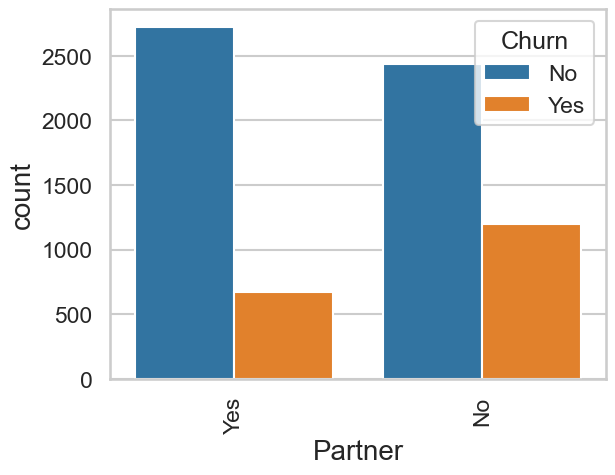

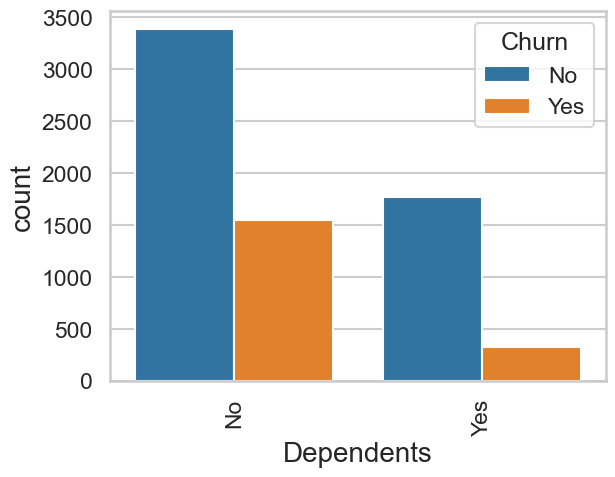

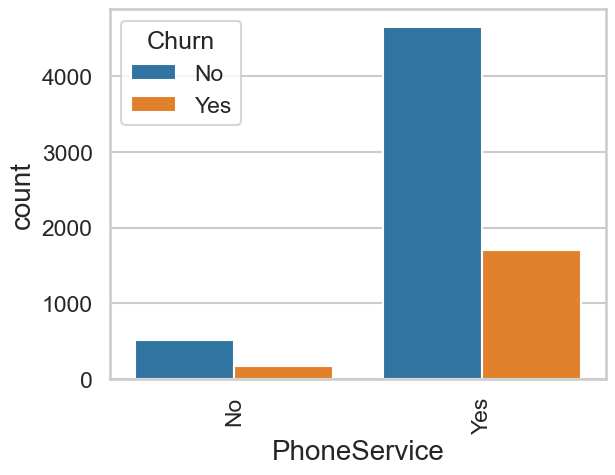

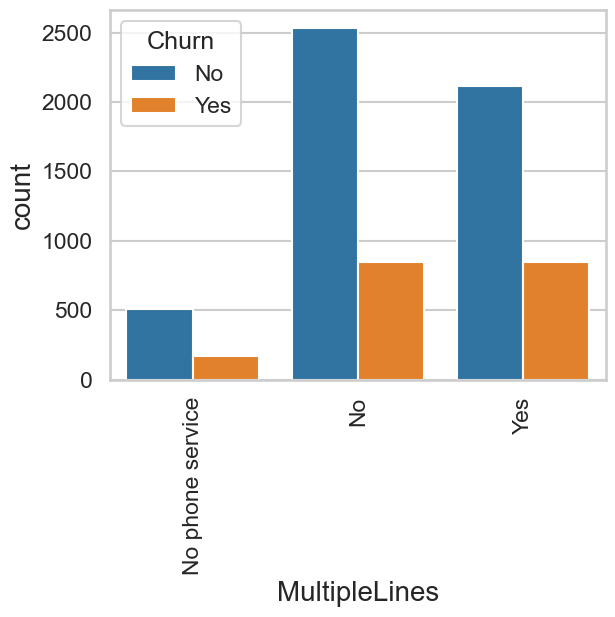

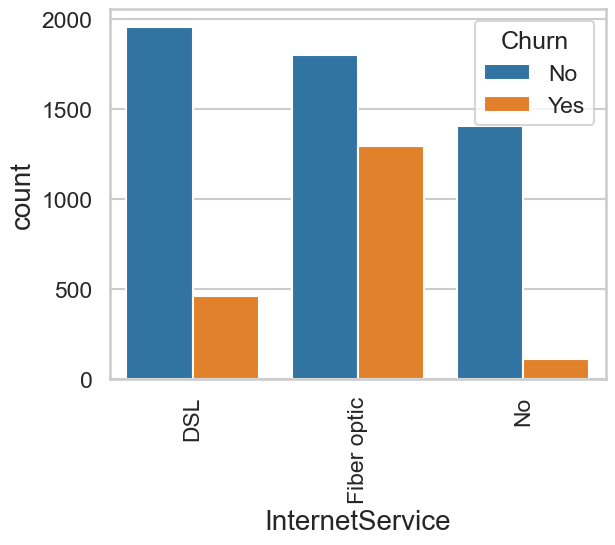

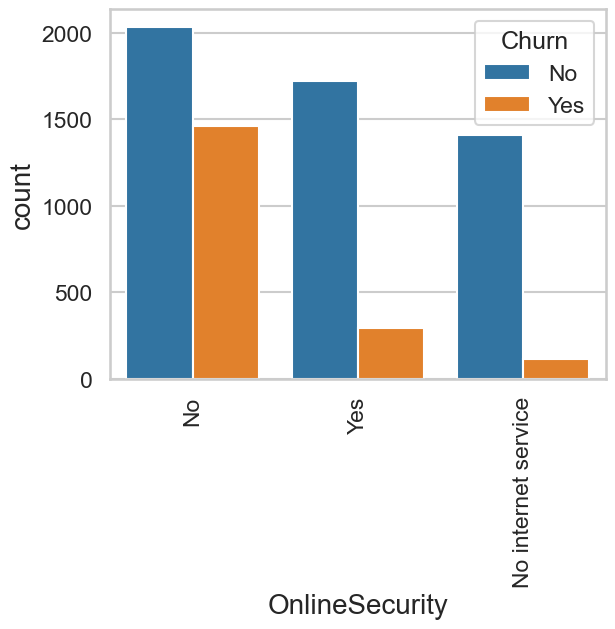

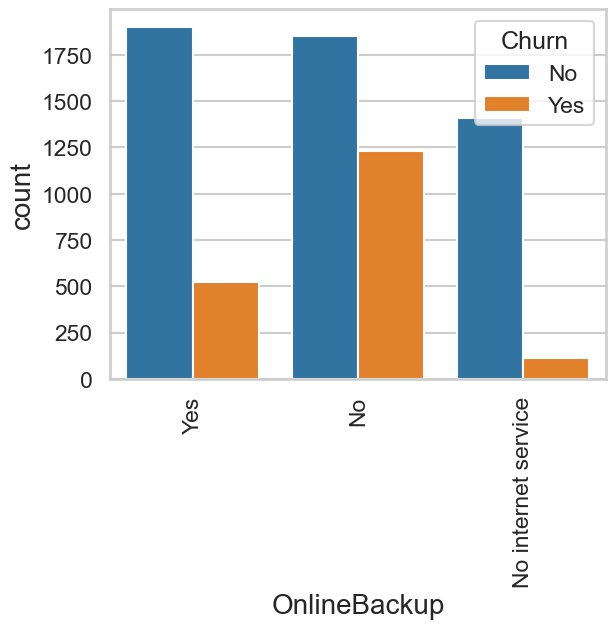

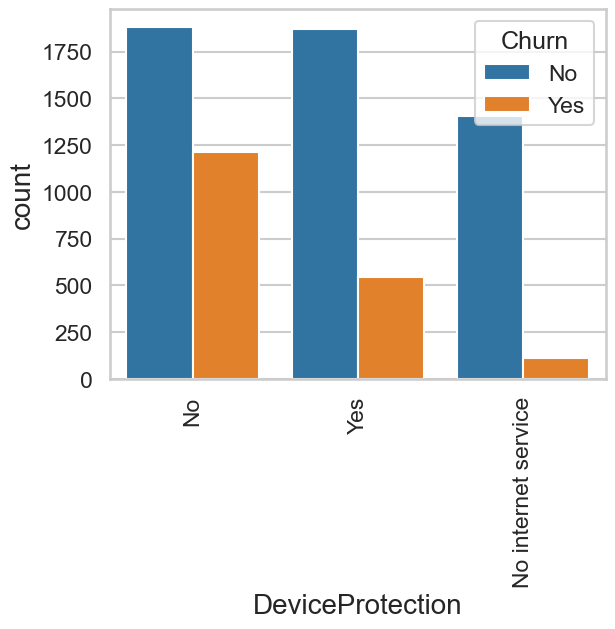

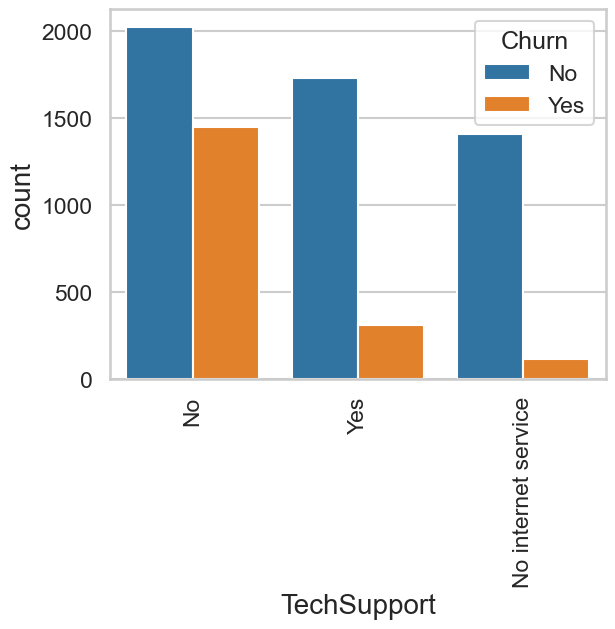

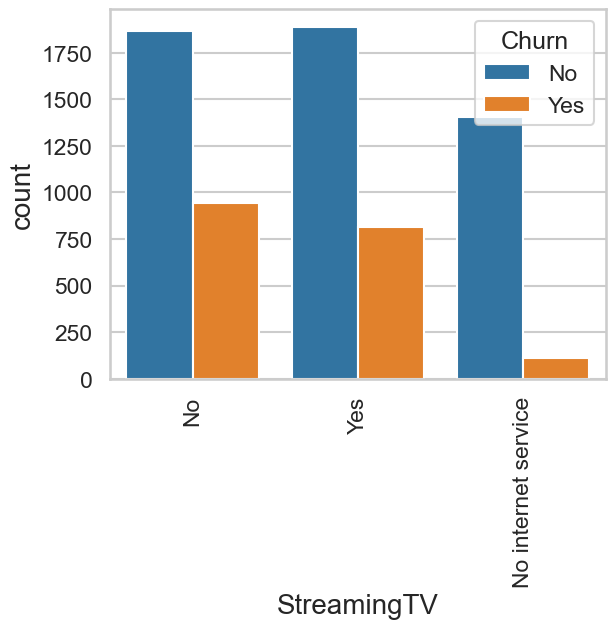

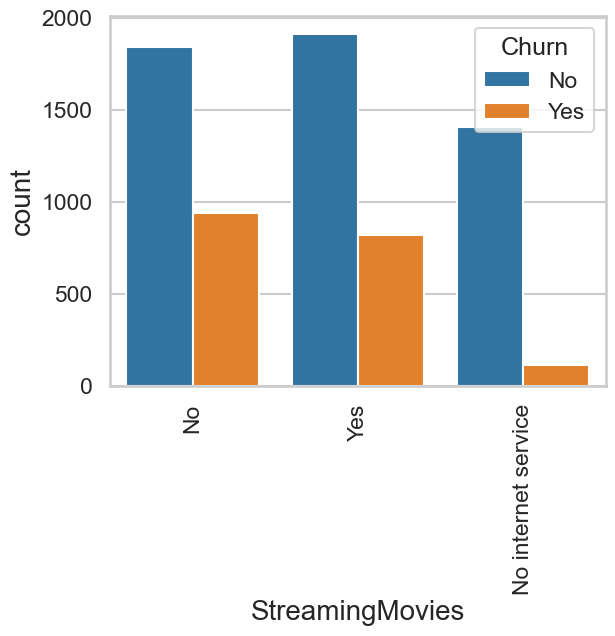

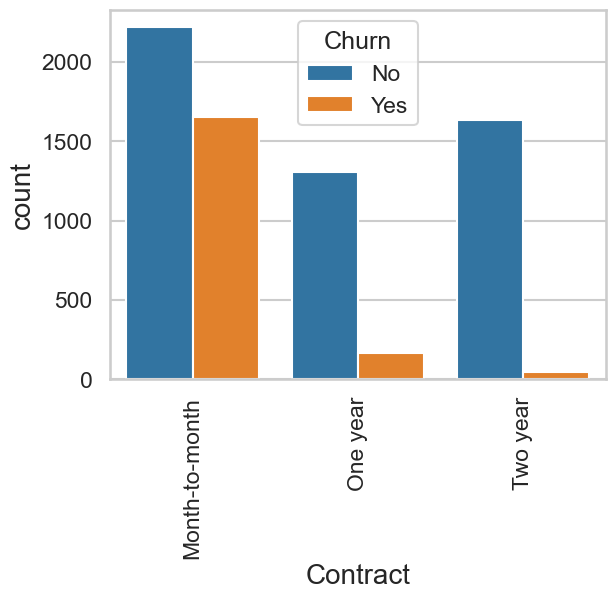

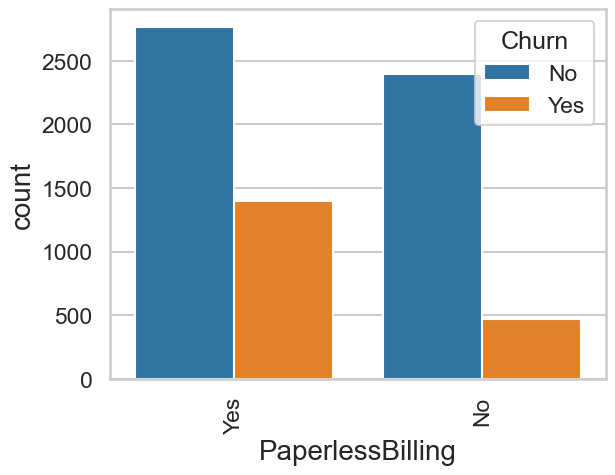

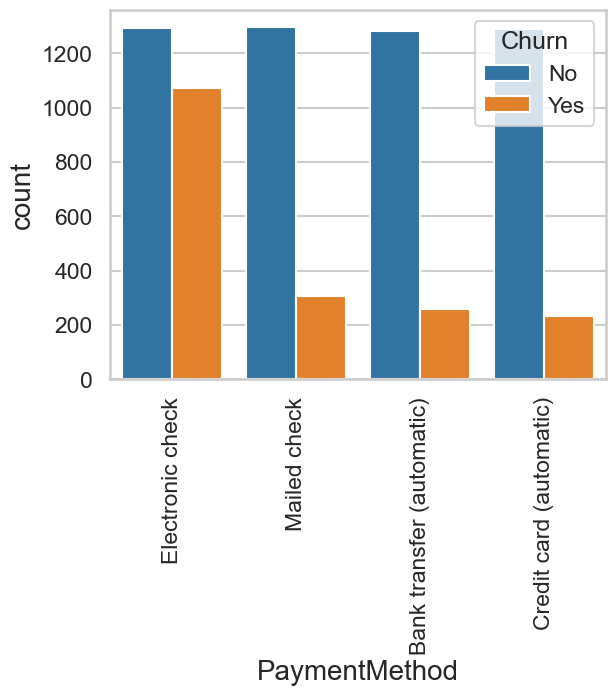

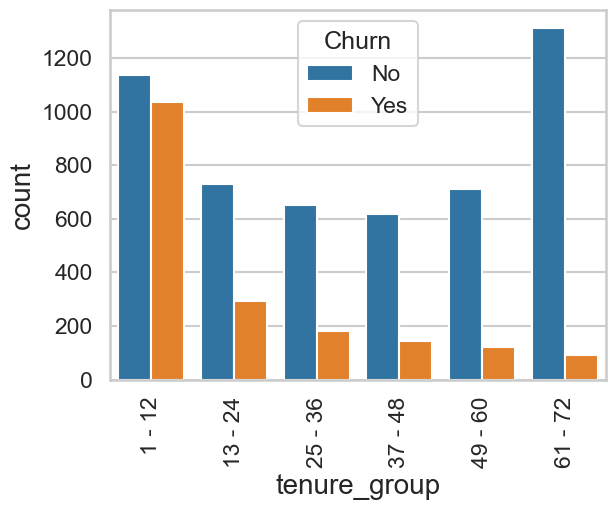

In [170]:
for i , predictor in enumerate(df_copy.drop(['Churn','TotalCharges','MonthlyCharges'],axis=1)):
    plt.figure(i)
    sns.countplot(data=df_copy,x=predictor,hue='Churn')
    plt.xticks(rotation=90)

* convert the churn into binary
* it is the target variable

In [171]:
# df_copy['Churn']=df_copy['Churn'].replace({'Yes':1,'No':0})
# df_copy['Churn']=df_copy.Churn.replace({'Yes':1,'No':0})
df_copy['Churn']=np.where(df_copy.Churn=='Yes',1,0)

In [172]:
df_copy.sample()

gender  SeniorCitizen Partner Dependents PhoneService MultipleLines   
1755  Female              0      No         No          Yes            No  \

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport   
1755             DSL             No          Yes               No         Yes  \

     StreamingTV StreamingMovies        Contract PaperlessBilling   
1755          No              No  Month-to-month              Yes  \

         PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
1755  Electronic check            54.3         654.5      0       1 - 12

* Converting all categorical variables into numerical values 
* This is achieved using one hot encoding,label encoding etc.


In [173]:
df_copy_dummy = pd.get_dummies(df_copy) 
# This is one hot encoding 
# Label encoding should be done only for target variables as in
# this case Churn we change it to 0,1 we dont use it for all columns 
# because the model may think it as the models might think of the 
# arbitirary no.s as the rank to the variables 

In [174]:
df_copy_dummy.head()
# df_copy

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female   
0              0           29.85         29.85      0           True  \
1              0           56.95       1889.50      0          False   
2              0           53.85        108.15      1          False   
3              0           42.30       1840.75      0          False   
4              0           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...   
0        False       False         True           True           False  ...  \
1         True        True        False           True           False  ...   
2         True        True        False           True           False  ...   
3         True        True        False           True           False  ...   
4        False        True        False           True           False  ...   

   PaymentMethod_Bank transfer (automatic)   
0                                    False  \
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check   
0                                  False                            True  \
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24   
0                       False                 True                 False  \
1                        True                False                 False   
2                        True                 True                 False   
3                       False                False                 False   
4                       False                 True                 False   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60   
0                 False                 False                 False  \
1                  True                 False                 False   
2                 False                 False                 False   
3                 False                  True                 False   
4                 False                 False                 False   

   tenure_group_61 - 72  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 51 columns]

In [175]:
df_copy_dummy = df_copy_dummy.replace({True:1,False:0})
# df_copy_dummy=np.where(df_copy_dummy==True,1,0)
# we didnt use 'True' because it is boolean value not a string 

In [176]:
df_copy_dummy.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female   
0              0           29.85         29.85      0              1  \
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...   
0            0           0            1              1               0  ...  \
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   PaymentMethod_Bank transfer (automatic)   
0                                        0  \
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check   
0                                      0                               1  \
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24   
0                           0                    1                     0  \
1                           1                    0                     0   
2                           1                    1                     0   
3                           0                    0                     0   
4                           0                    1                     0   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60   
0                     0                     0                     0  \
1                     1                     0                     0   
2                     0                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   tenure_group_61 - 72  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 51 columns]

* relation between monthly and total charges

In [177]:
# # Choosing the Right Plot
# Scatter Plot: When you want to see the direct relationship between two continuous variables.
# Pair Plot: When you want to explore relationships between multiple continuous variables.
# Heatmap: When you want to see the correlation matrix of multiple numerical variables.
# Box Plot: When you want to compare distributions of a continuous variable across different categorical groups.
# Violin Plot: When you want to compare distributions and also see the density of a continuous variable across different categorical groups.
# An lmplot is used in Seaborn to plot data and a regression model fit. It’s particularly useful when you want to visualize the
#  linear relationship between two variables and include the regression line with confidence intervals.

Text(0, 0.5, 'Total')

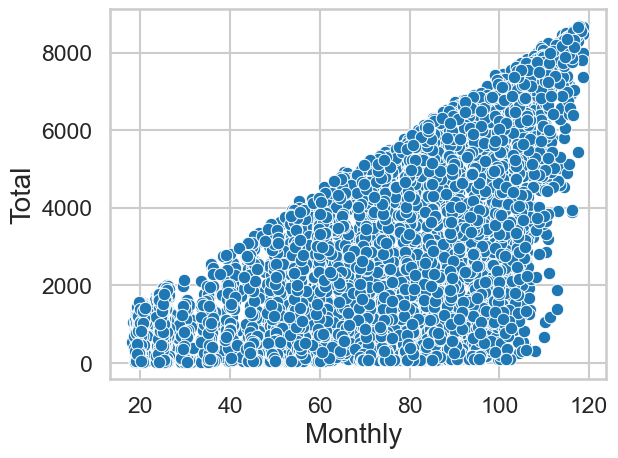

In [178]:
sns.scatterplot(data=df_copy_dummy,x='MonthlyCharges',y='TotalCharges')
plt.xlabel('Monthly ')
plt.ylabel('Total')

Text(34.000000000000014, 0.5, 'Total')

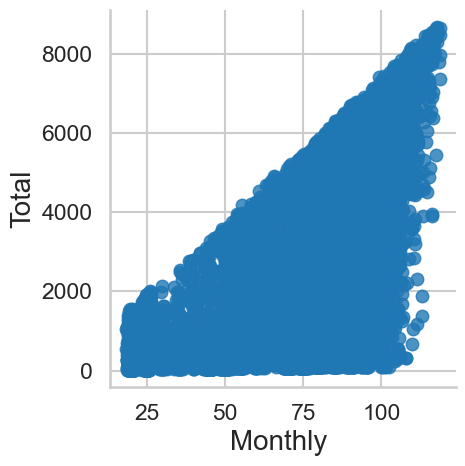

In [179]:
sns.lmplot(data=df_copy_dummy,x='MonthlyCharges',y='TotalCharges',fit_reg=False)
plt.xlabel('Monthly ')
plt.ylabel('Total')

* Total charges increases as monthly charges increase


* Churn by monthly and Total charges 

C:\Users\anubh\AppData\Local\Temp\ipykernel_11008\3759805977.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(df_copy_dummy.MonthlyCharges[(df_copy_dummy["Churn"]==0)],
C:\Users\anubh\AppData\Local\Temp\ipykernel_11008\3759805977.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(df_copy_dummy.MonthlyCharges[(df_copy_dummy["Churn"]==1)],


Text(0.5, 1.0, 'Monthly charges by churn')

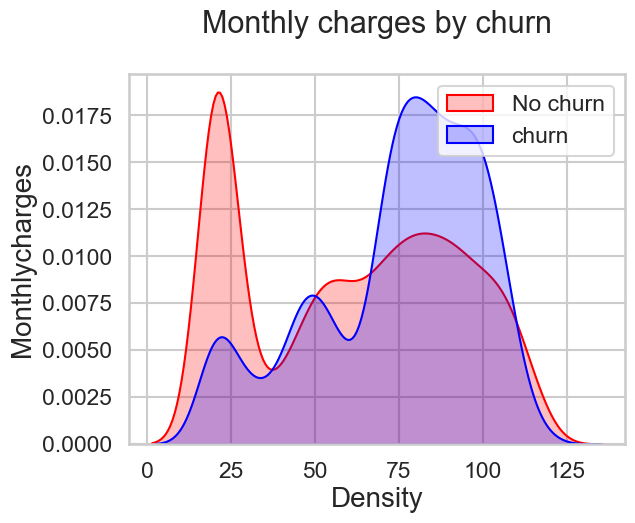

In [180]:
Month = sns.kdeplot(df_copy_dummy.MonthlyCharges[(df_copy_dummy["Churn"]==0)],
                    color="Red",shade=True)
Month = sns.kdeplot(df_copy_dummy.MonthlyCharges[(df_copy_dummy["Churn"]==1)],
                    color="blue",shade=True)
Month.legend(['No churn','churn'],loc = 'upper right')
plt.xlabel('Density')
plt.ylabel('Monthlycharges')
plt.title('Monthly charges by churn')
# plt.show()

C:\Users\anubh\AppData\Local\Temp\ipykernel_11008\1473601213.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(df_copy_dummy.TotalCharges[(df_copy_dummy["Churn"]==0)],
C:\Users\anubh\AppData\Local\Temp\ipykernel_11008\1473601213.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(df_copy_dummy.TotalCharges[(df_copy_dummy["Churn"]==1)],


Text(0.5, 1.0, 'Total charges by churn')

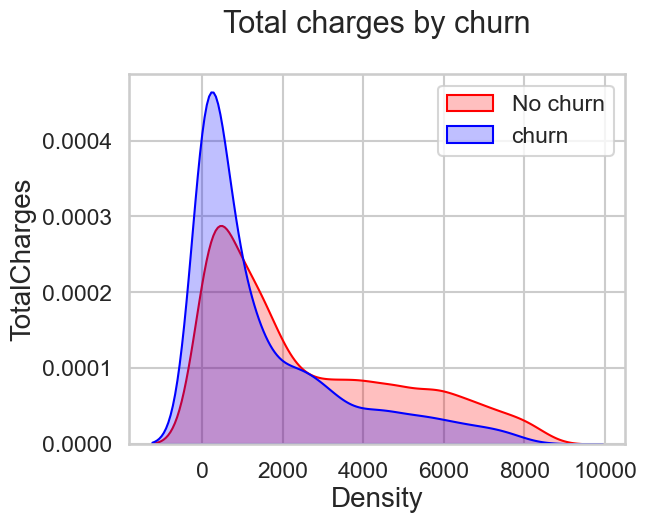

In [181]:
Month = sns.kdeplot(df_copy_dummy.TotalCharges[(df_copy_dummy["Churn"]==0)],
                    color="Red",shade=True)
Month = sns.kdeplot(df_copy_dummy.TotalCharges[(df_copy_dummy["Churn"]==1)],
                    color="blue",shade=True)
Month.legend(['No churn','churn'],loc = 'upper right')
plt.xlabel('Density')
plt.ylabel('TotalCharges')
plt.title('Total charges by churn')
# plt.show()

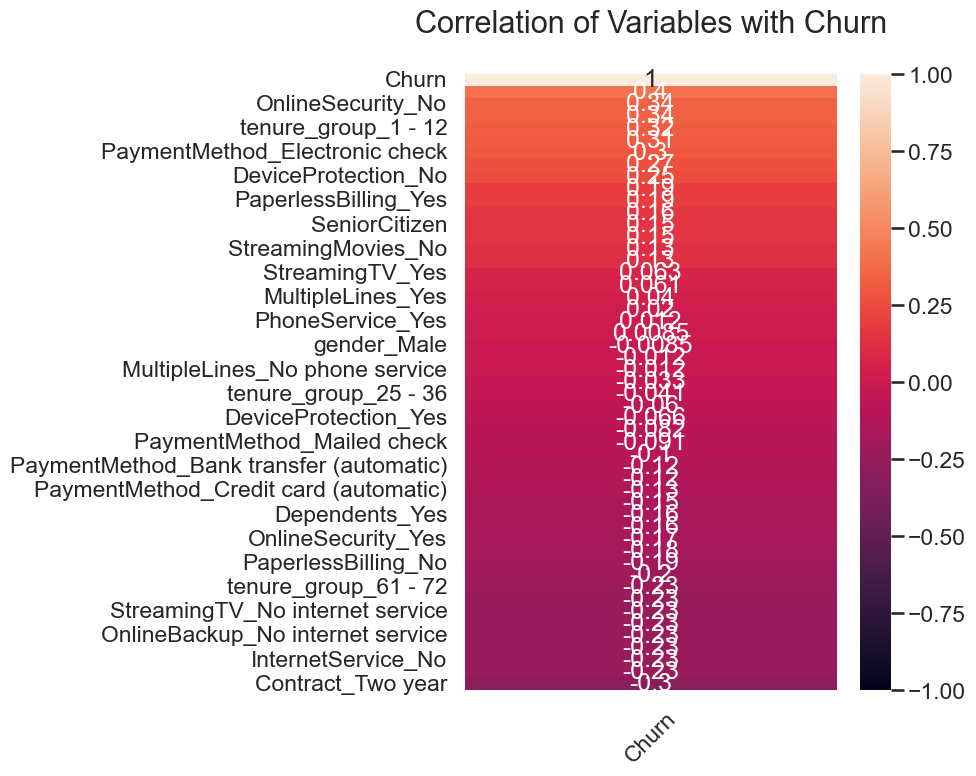

In [182]:
plt.figure(figsize=(6,8))
corr =df_copy_dummy.corr()['Churn'].sort_values(ascending=False)# this is a series a heatmap wants data frame
# print(corr)
sns.heatmap(pd.DataFrame(corr),annot=True,vmin=-1,vmax=1)
plt.title('Correlation of Variables with Churn')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

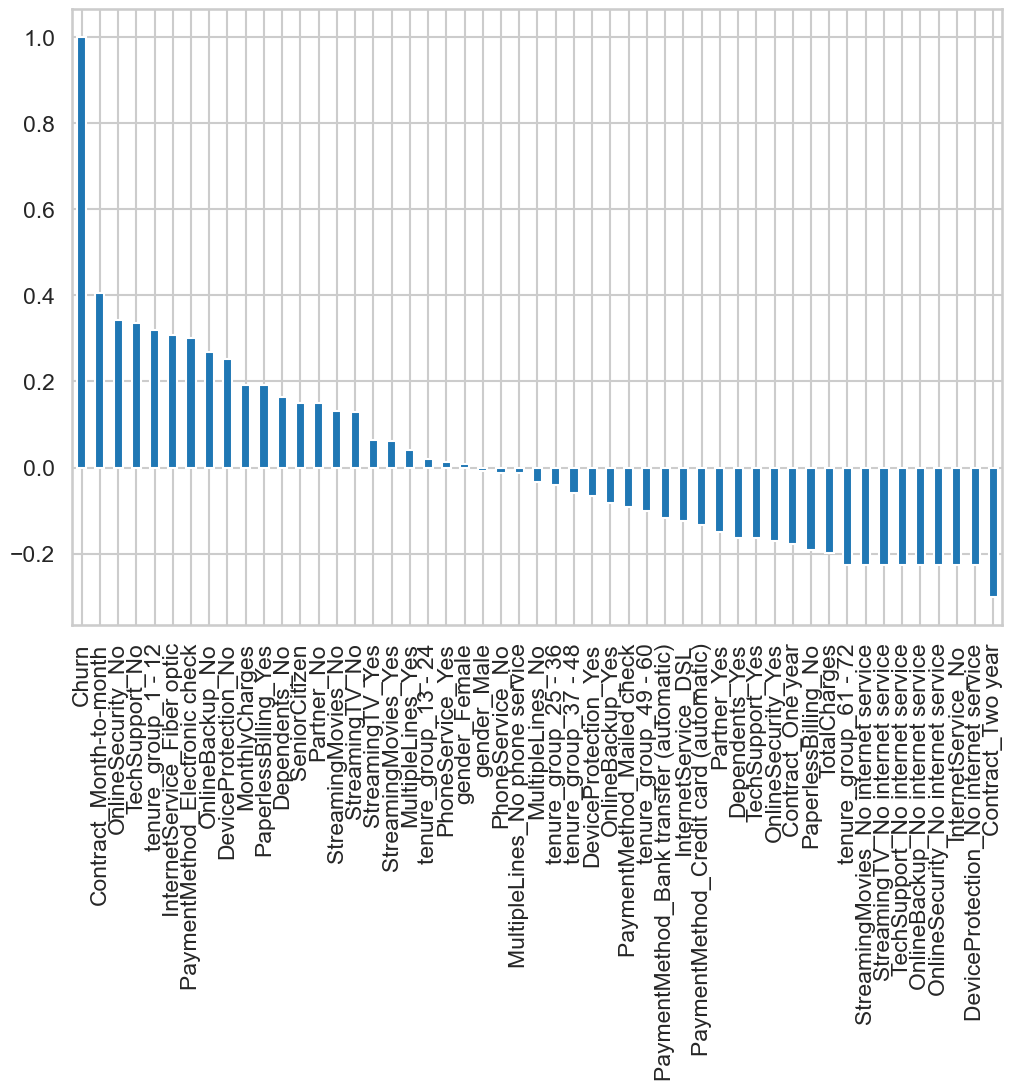

In [183]:
plt.figure(figsize=(12,8))
corr =df_copy_dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

* Derived Insight 
* High Churn seen in case of Month to Month contracts, No online security,no trch support,first year of subs and fibre optics internet
* Low Churn seen in cas of long term,contacts,Subscription without service and the customers engaged for 5+ years
* Factors like gender,avail of phone service and multiple line have almost no effect.

<Axes: >

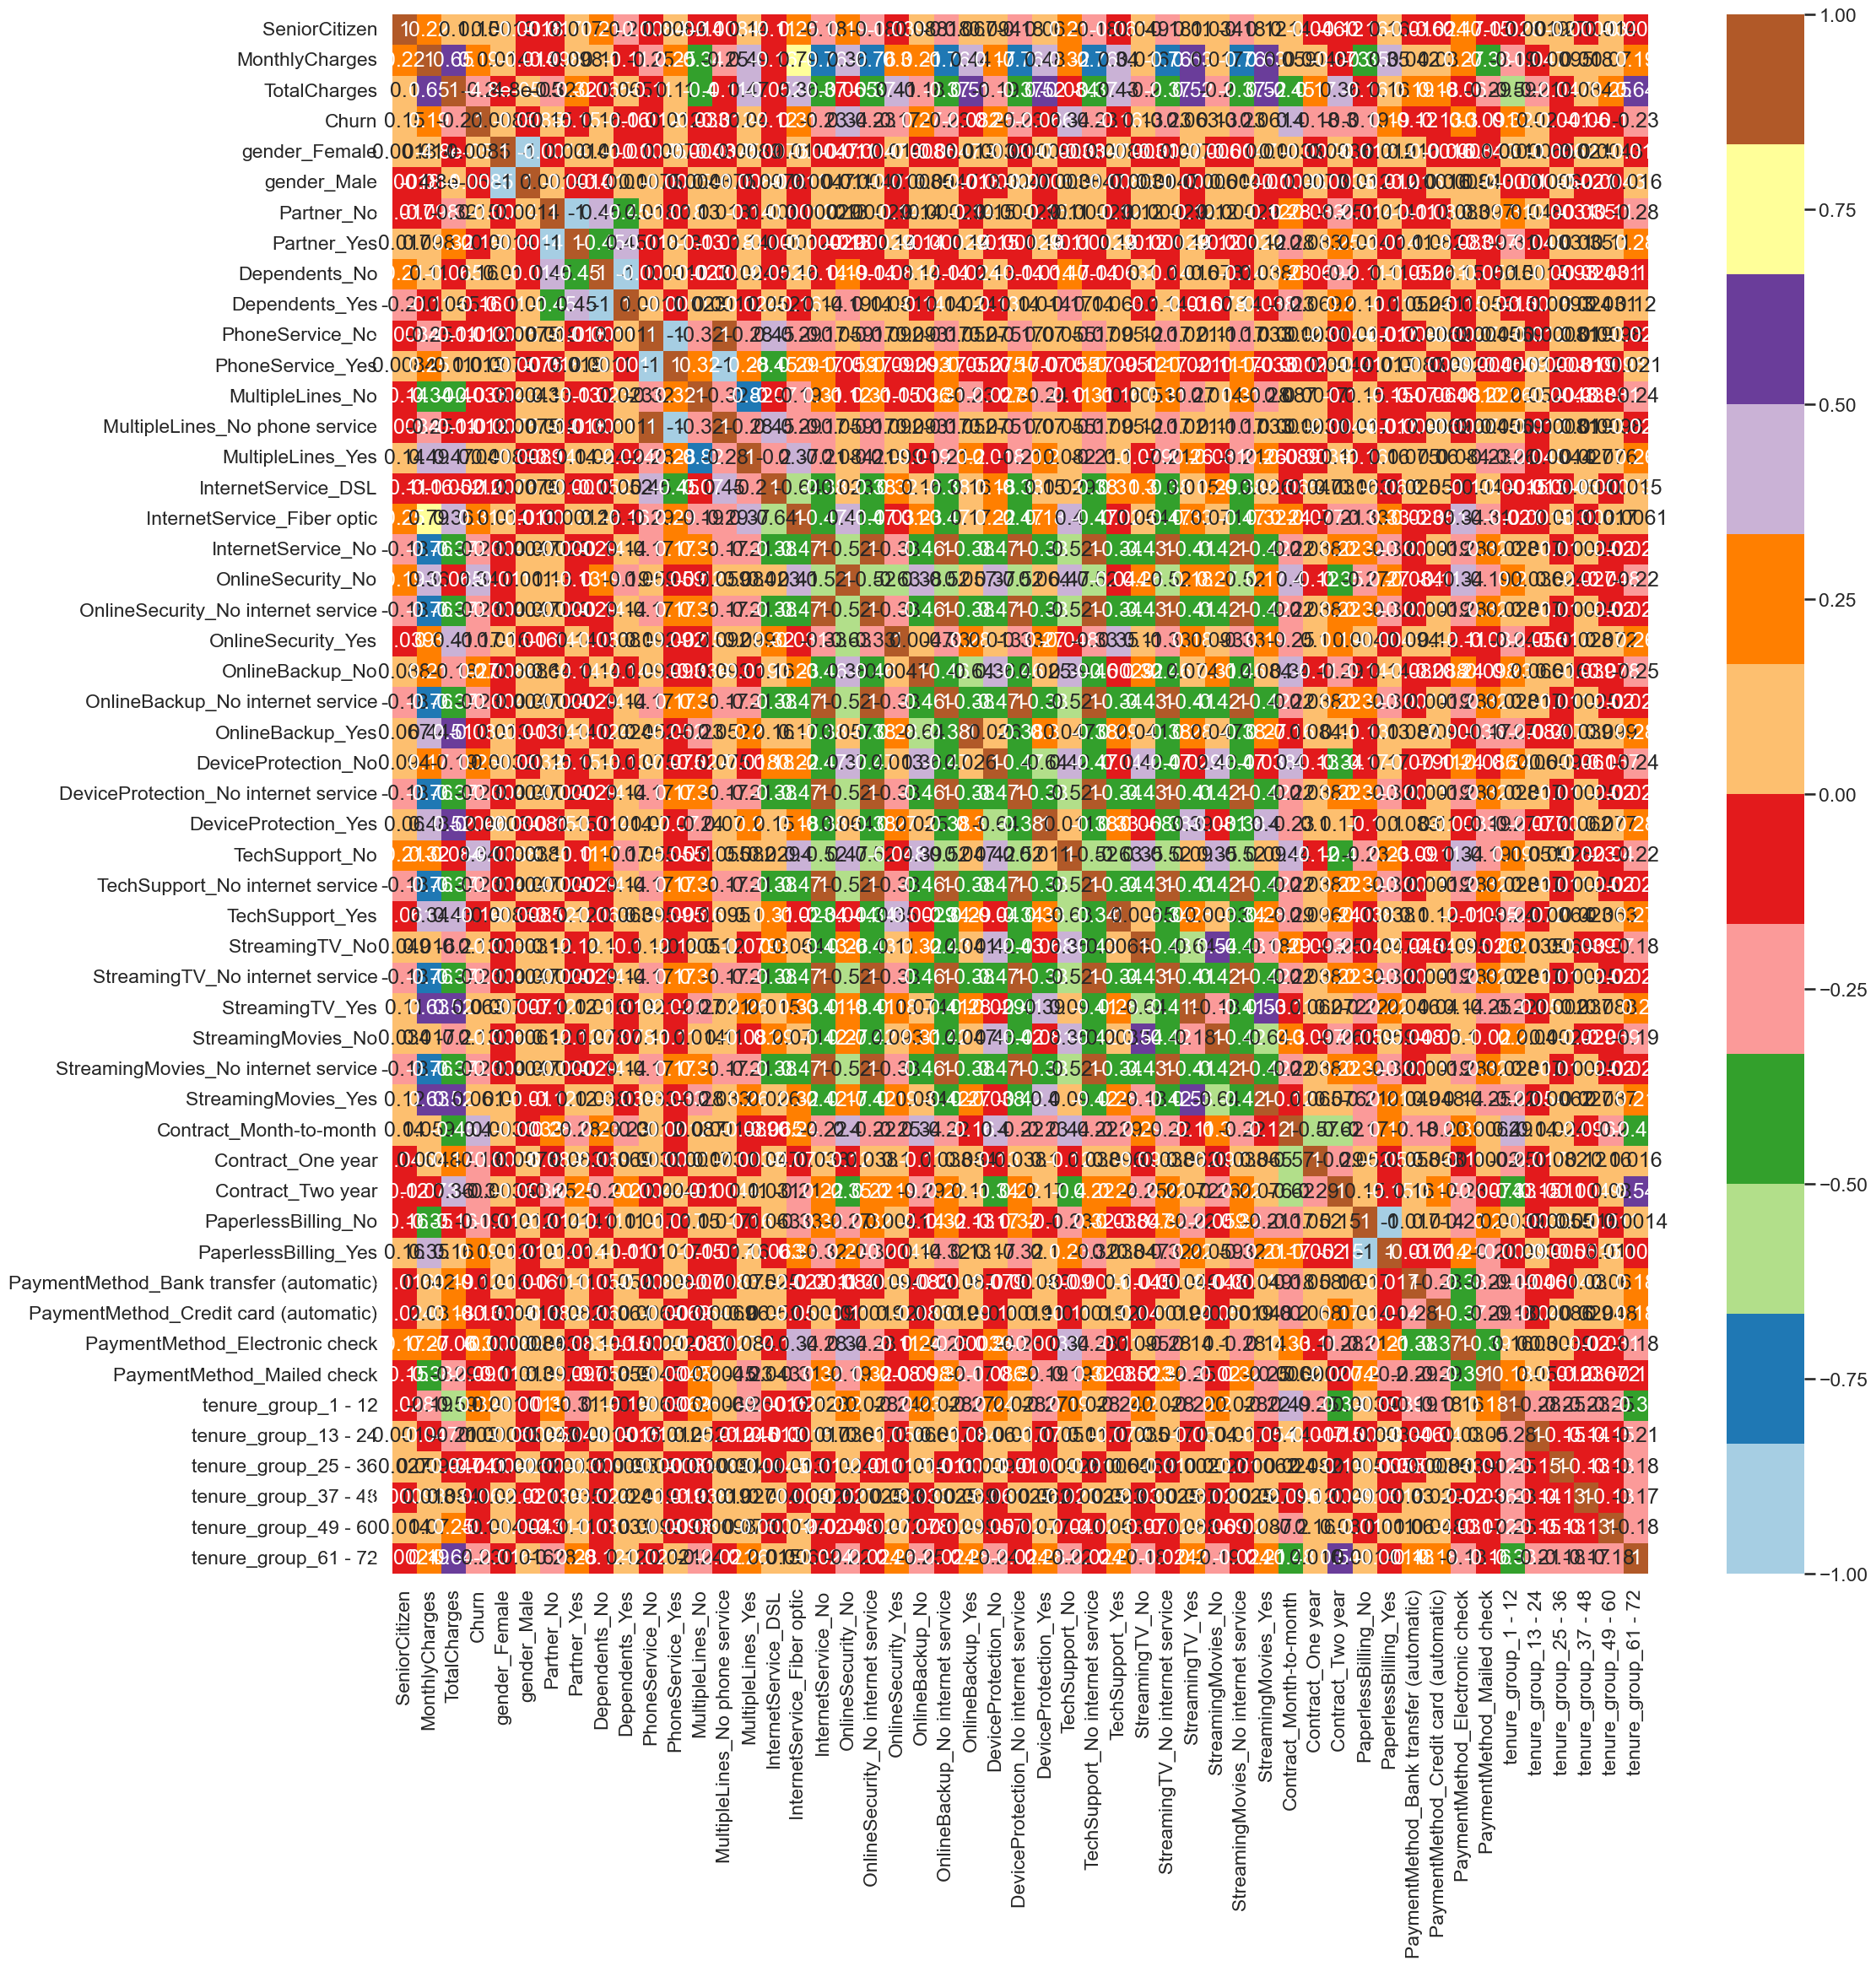

In [184]:
plt.figure(figsize=(24,24))
sns.heatmap(df_copy_dummy.corr(),annot=True,cmap="Paired")

###  Bivariate Analysis
* means analysing 2 variables


In [185]:
new_df1 = df_copy.loc[df_copy["Churn"]==0]
new_df10 = df_copy.loc[df_copy["Churn"]==1]

In [186]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()
# def uniplot(df,col,title,hue=None):
#     sns.set_style('whitegrid')
#     sns.set_context('talk')#This affects the 
#     # scale of plot elements like labels, lines, and markers.Makes plot suitable for presentation.
#     plt.rcParams["axes.labelsize"]=20  #These settings control the appearance of plots, including figure size, line width, font size, and many other attributes.
#     plt.rcParams["axes.titlesize"]=22
#     plt.rcParams["axes.titlepad"]=30

#     temp =pd.Series(data=hue)
#     fig,ax= plt.subplots()
#     # In the context of Matplotlib and Seaborn, ax (short for axis) refers to an 
#     # Axes object, which is the area on which data is plotted in a Matplotlib figure.
#     #  An Axes object represents a single plot or graph within a figure, and a figure can contain multiple Axes objects.
#     width = len(df[col].unique()) + 7 +4*len(temp.unique())
#     fig.set_size_inches(width,8)
#     plt.xticks(rotation=45)
#     plt.yscale('log')
#     plt.title(title)
#     ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
#     plt.show()


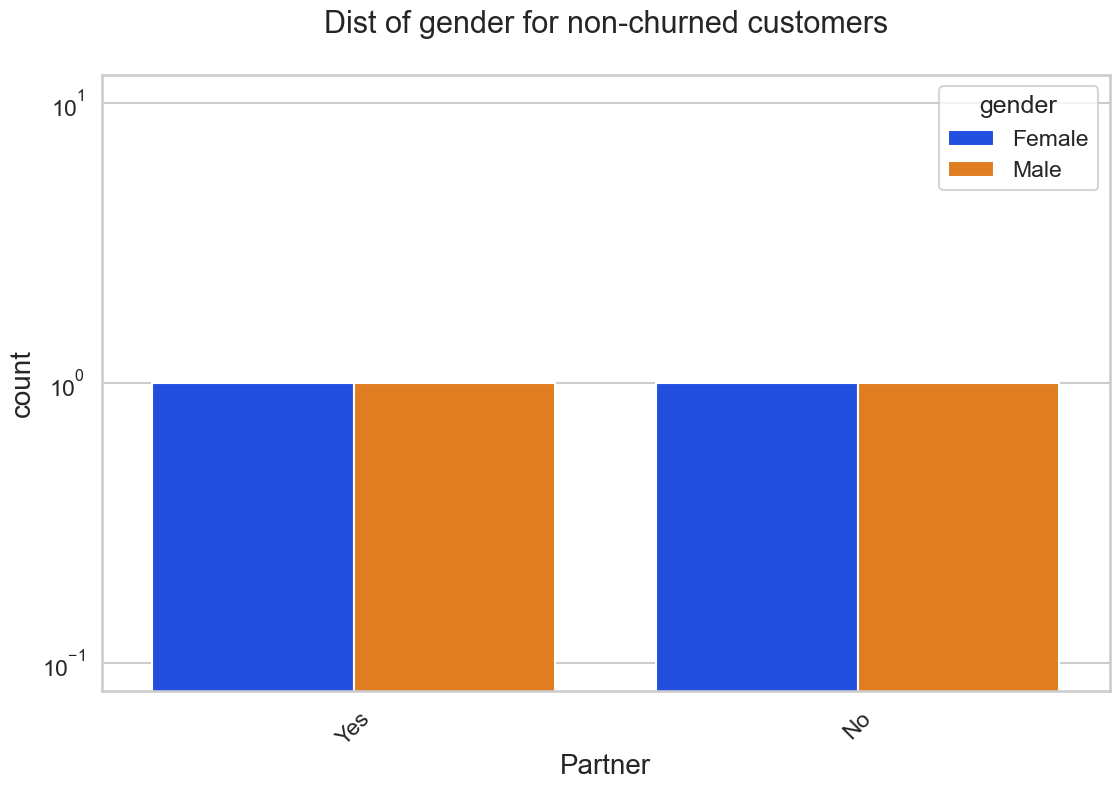

In [187]:
uniplot(new_df1,col='Partner',title='Dist of gender for non-churned customers',hue='gender')

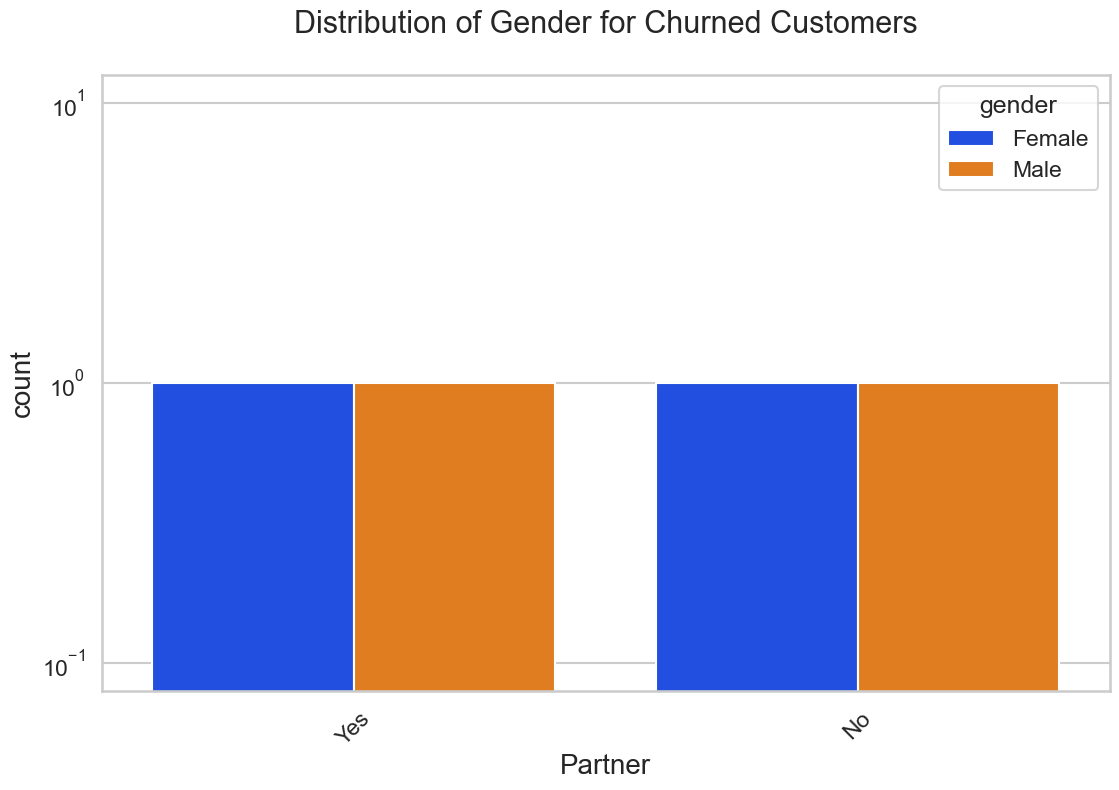

In [188]:
uniplot(new_df1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

# Conclusion


In [189]:
df_copy_dummy.to_csv('df_churn.csv')